In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [29]:
df=pd.read_csv('../output/no_outliers.csv')
X=df[['ASVAB','HighSchoolGrade']]
y=df.FamilyIncome

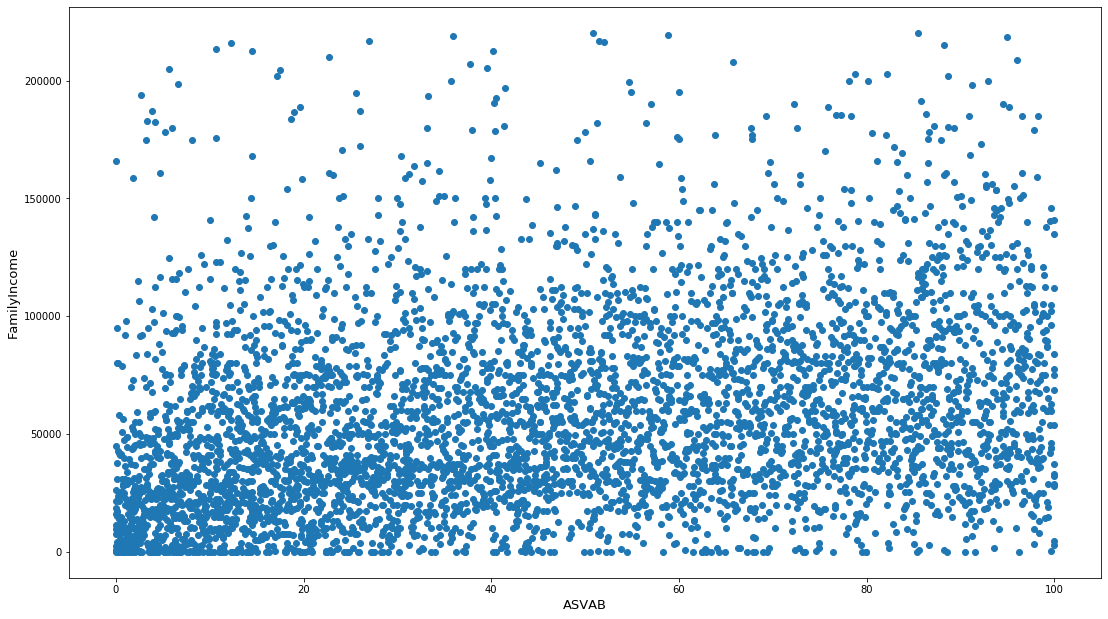

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(x = df.ASVAB, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('ASVAB', fontsize=13)
plt.show()
plt.close()

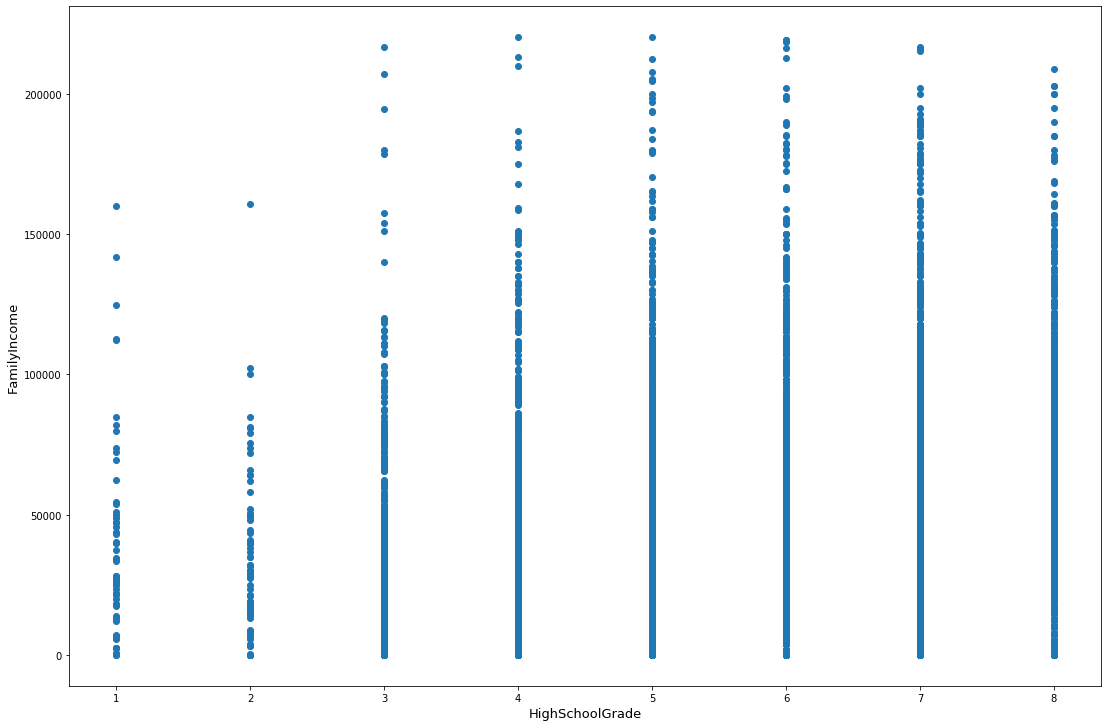

In [7]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 12.5)

ax.scatter(x = df.HighSchoolGrade, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('HighSchoolGrade', fontsize=13)
plt.show()
plt.close()

In [30]:
print(X.shape)
print(y.shape)


(5020, 2)
(5020,)


In [39]:
regressor = LinearRegression()  
regressor.fit(X, y)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
#To retrieve the intercept:
print(regressor.intercept_)
print(regressor.score(X, y))

                 Coefficient
ASVAB             352.679752
HighSchoolGrade  2759.348803
25827.84370446935
0.100761010727623


**Let's try splitting the data**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:

print(X_train.shape)
print(y_train.shape)

regressor2 = LinearRegression()  
regressor2.fit(X_train, y_train) #training the algorithm

(4016, 2)
(4016,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
coeff_df_2 = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])  

#For retrieving the slope:
print(coeff_df_2)
#To retrieve the intercept:
print(regressor2.intercept_)
 
print(regressor2.score(X_train, y_train))

                 Coefficient
ASVAB             345.391849
HighSchoolGrade  2403.505474
27786.227034224838
0.09211897153492377


In [46]:
y_pred = regressor2.predict(X_test)
print(y_pred)
print(y_test)


[64431.92022702 49338.98719248 51385.4339001  ... 46666.95944017
 79630.65934299 46781.01515591]
971      82750
3707    120002
2708     37000
302      90000
3805     34500
         ...  
4684     40000
263     147530
2204     52500
788      86000
2148     26000
Name: FamilyIncome, Length: 1004, dtype: int64


In [47]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29666.703114816963
Mean Squared Error: 1502824621.9378102
Root Mean Squared Error: 38766.28202365827
